<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/Plotting_Studenti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>







count         175
unique          2
top       Maschio
freq          102
Name: Sesso? , dtype: object


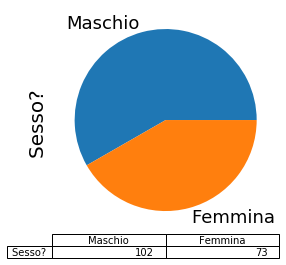

count     175
unique      7
top        17
freq       73
Name: Et?, dtype: object


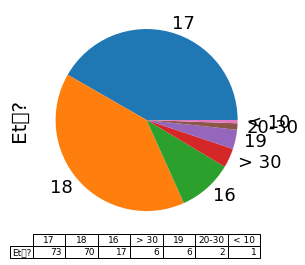

count     175
unique      2
top        Si
freq      160
Name: Sei interessata/o alla Scienza?, dtype: object


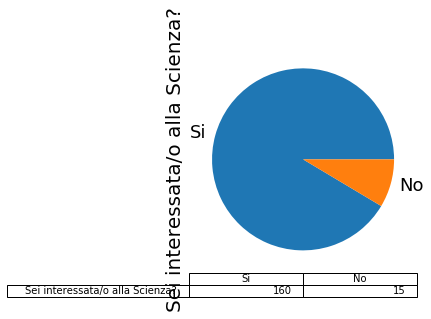

count     175
unique      2
top        No
freq      129
Name: Vuoi fare la scienziata/o in futuro?, dtype: object


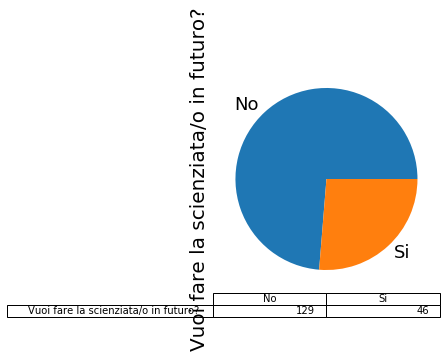

count            175
unique             4
top       ABBASTANZA
freq              90
Name: Quanto hai trovato interessante la lezione?, dtype: object


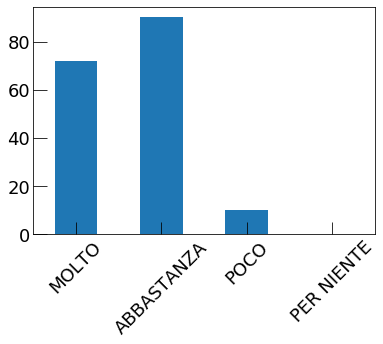

count            175
unique             5
top       ABBASTANZA
freq              99
Name: Quanto la lezione  stata adeguata alla tua preparazione?, dtype: object


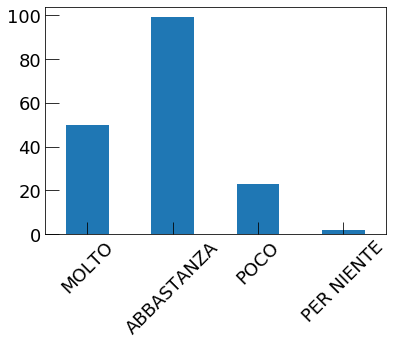

count       175
unique        4
top       MOLTO
freq        103
Name: Quanto  stato chiaro il docente?, dtype: object


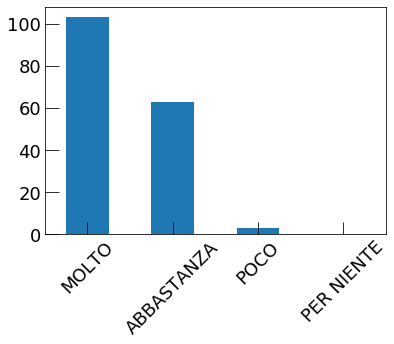

count            175
unique             5
top       ABBASTANZA
freq              82
Name: Quanto ritieni adeguati i materiali ed esercizi presentati?, dtype: object


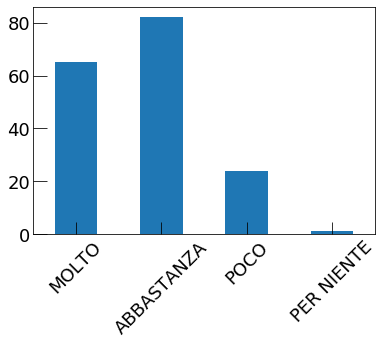

count            175
unique             4
top       ABBASTANZA
freq              79
Name: Quanto ritieni che la lezione servir per i tuoi studi?, dtype: object


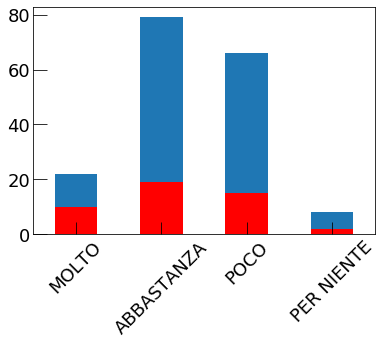

count       175
unique        5
top       MOLTO
freq         70
Name: Quanto ritieni importante il tema trattato per il tuo futuro?, dtype: object


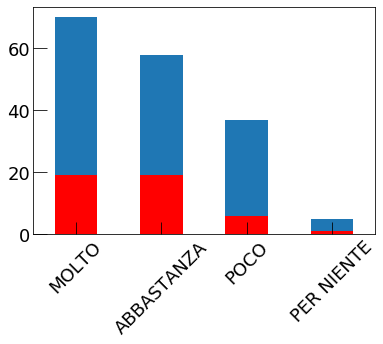

0 Essendo comunque abbastanza complicato e ampio lÕargomento, la singola trattazione in solo due ore  molto concentrata e poco apporfondita; colpa del tempo
1 Fare qualche esempio pratico, per il resto  stata un esperienza interessante 
2 Dati per scontati concetti un poÕ oltre la personale preparazione, il che ha reso il discorso un poÕ pi complicato,
Ma professore disponibilissimo a spiegazioni, chiarimenti e curiosit. Esperienza molto positiva
3 Lo sfondo scuro delle diapositive non facilita la visione delle immagini pi scure
4 Lezione importante per il futuro della fisica e del genere umano in generale, non per il mio futuro personale 
5 La conferenza e`  stata un' esperienza davvero interessante. Per questo motivo, se possibile,  creare un corso settimanale a scuola sarebbe davvero una bella iniziativa.
6 La lezione  stata molto interessante e gli argomenti trattati sono stati epressi molto chiaramente con esempi.
7 Ho trovato poco scorrevole la prima parte del seminario, me

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mylib as my
%matplotlib inline
my.set_atlas_style('smal')
info =pd.DataFrame([
    {'scuola':'ITIS E. Fermi - Roma', 'data':'2017-01-20', 'titolo':'CoScienza al Verde', 'alunni':'30'},
    {'scuola':'Paster - Roma', 'data':'2017-02-03', 'titolo':'Computing e Particelle', 'alunni':'50'},
    {'scuola':'Plinio Seniore - Roma', 'data':'2017-02-24', 'titolo':'Focus Grupo Termodinamica', 'alunni':'20'},
    {'scuola':'Giulio Cesare - Roma', 'data':'2017-04-10', 'titolo':'Fisica Moderna', 'alunni':'30'},
    {'scuola':'Giulio Cesare - Roma', 'data':'2017-05-06', 'titolo':'Focus Grupo Termodinamica', 'alunni':'25'},
    {'scuola':'Plinio Seniore - Roma', 'data':'2017-11-01', 'titolo':'Focus Grupo Termodinamica', 'alunni':'25'},
    {'scuola':'Enriques - Ostia', 'data':'2018-01-22', 'titolo':'Fisica Moderna', 'alunni':'40'},
    {'scuola':'Democrito - Casal Palocco 1/2', 'data':'2018-01-29', 'titolo':'Fisica Moderna', 'alunni':'140'},
    {'scuola':'Azzarita - Roma', 'data':'2018-02-21', 'titolo':'Focus Grupo Termodinamica', 'alunni':'70'},
    {'scuola':'Von Neumann - Roma', 'data':'2019-01-15', 'titolo':'Onde Gravitazionali', 'alunni':'30'},
    {'scuola':'IIS Croce-Aleramo - Roma', 'data':'2019-01-22', 'titolo':'Energia e Ssotenibilità', 'alunni':'60'},
    {'scuola':'Liceo Scientifico G. Pellecchia - Cassino', 'data':'2019-02-12', 'titolo':'Onde Gravitazionali', 'alunni':'120'},
    {'scuola':'Faraday - Ostia', 'data':'2019-02-27', 'titolo':'Fisica Moderna', 'alunni':'30'},
    {'scuola':'Azzarita - Roma', 'data':'2019-04-10', 'titolo':'Fisica Moderna', 'alunni':'40'}
    ])


ordine = ['MOLTO', 'ABBASTANZA', 'POCO', 'PER NIENTE']
####
# Atrire il file originale con EXCEL e salvarlo come "Tab Delimited txt" ########
####
df = pd.read_csv("/Users/mazzitel/Dropbox/edu/Dammi un feedback!.txt", sep='\t', header=0, encoding='latin1')

df = df[pd.isnull(df['Vuoi fare la scienziata/o in futuro?']) == False] # purga da fake line insane

###########              
# decommentare per un range specifico e non selezionare per la scuuola.
dataStart = '2017-01-01'
dataEnd   = '2100-01-01'
selectScuola = ''
###########

info=info.set_index("scuola")
#selectScuola = 'Faraday - Ostia'

print ("\n\n")
if selectScuola !='':
    print (info.loc[selectScuola])

print ("\n\n")

if selectScuola !='':
    dataStart = info.loc[selectScuola, 'data' ]
if selectScuola !='':
    date = info['data'].values
    for i in range(0, len(date)):
        if dataStart == date[i]:
            if i+1 == len(date):
                dataEnd   = '2100-01-01'
            else:
                dataEnd = date[i+1]



# print dataStart, dataEnd
df = df[(pd.to_datetime(df['Timestamp']) >= dataStart) & (pd.to_datetime(df['Timestamp']) < dataEnd)]
for i in range(df.columns.get_loc('Sesso? '), len(df.columns)-1):
    if i > df.columns.get_loc('Vuoi fare la scienziata/o in futuro?'):
        pd.value_counts(df[df.columns[i]]).reindex(ordine).plot(
            kind='bar'
        )      
        if i > df.columns.get_loc('Quanto ritieni adeguati i materiali ed esercizi presentati?'):
            pd.value_counts(df[df.columns[i]][df['Vuoi fare la scienziata/o in futuro?'] == 'Si']).reindex(ordine).plot(
                kind='bar', color='red'
            )
        
    else:
        pd.value_counts(df[df.columns[i]]).plot(kind='pie', table=True)
    print (df[df.columns[i]].describe())
    plt.xticks(rotation=45)
    plt.show()
dp = df['Commenti e suggerimenti:'][pd.isnull(df['Commenti e suggerimenti:']) == False]
for i in range (0, len(dp.values)):
    print (i, dp.values[i])

In [0]:
info=info.set_index("titolo")
selectTitolo = 'Focus Grupo Termodinamica'
print ("\n\n")
if selectTitolo !='':
    print (info.loc[selectTitolo])
if selectTitolo !='':
    dataStart = info.loc[selectTitolo, 'data' ]

if selectScuola !='':
    date = info['data'].values
    for i in range(0, len(date)):
        if dataStart == date[i]:
            if i+1 == len(date):
                dataEnd   = '2100-01-01'
            else:
                dataEnd = date[i+1]




                          alunni        data
titolo                                      
Focus Grupo Termodinamica     20  2017-02-24
Focus Grupo Termodinamica     25  2017-05-06
Focus Grupo Termodinamica     25  2017-11-01
Focus Grupo Termodinamica     70  2018-02-21
